In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#For train Data
dfTrain = pd.read_csv('train.csv')
column_data1 = dfTrain['radius']
column_data2 = dfTrain['height']
y_train = dfTrain['surface_area']
X_train = np.column_stack((column_data1, column_data2))

#For test Data
dfTest = pd.read_csv('test.csv')
column_data3 = dfTest['radius']
column_data4 = dfTest['height']
y_test = dfTest['surface_area']
X_test = np.column_stack((column_data3, column_data4))

In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 1.0  # Regularization
ridge_reg = Ridge(alpha=alpha)  # Ridge Regression model

ridge_reg.fit(X_train_scaled, y_train)  # training

Ridge()

In [8]:
y_pred = ridge_reg.predict(X_test_scaled)  #predictions

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r_squared:.2f}')

Mean Squared Error (MSE): 8045936.93
Root Mean Squared Error (RMSE): 2836.54
R-squared (R²): 0.93


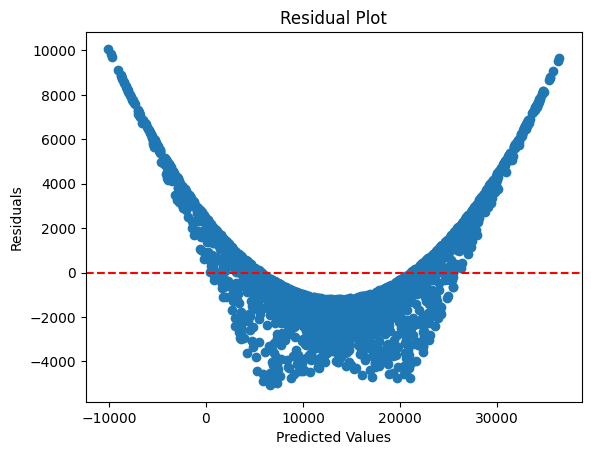

In [9]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')